In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
glosbe = pd.read_excel('glosbe_dictionary_words_sentences_extract.xlsx')
glosbe.head(10)

,english_word,twi_translation,some_english_phrases,some_twi_phrases
0,frustration,N/F,|['Perhaps you too find yourself in a situatio...,|['Ebia na wo nso wowɔ tebea bi a ɛte sɛ nea ɛ...
1,experimental,N/F,|['Their leader’s opulence and the sexual expe...,|['Wɔn kannifo no ade dodowpɛ ne nna mu nkitah...
2,royal,N/F,|['Whether they were from the royal line or no...,"|['Sɛ na wɔyɛ adehye anaa wɔnyɛ no, ntease wom..."
3,riot,ahum,|['And he was in and out of jails for gang fig...,|['Na odii afiase akɔneaba wɔ basabasayɛfo ntɔ...
4,elsewhere,N/F,|['13 After hearing a talk at a circuit assemb...,|['13 Bere a onua bi ne ne nuabea tiee ɔkasa b...
5,southern,N/F,"|['Even more significant, churchgoers in the S...","|['Nea ɛda adi kɛse no, asɔrekɔfo a wɔwɔ Asase..."
6,predator,N/F,|['Just when they need all the love and protec...,|['Wɔ bere a mmofra hia ɔdɔ ne ahobammɔ a wɔn ...
7,by,N/F,|[]|,|[]|
8,thick,N/F,|[]|,|[]|
9,item,N/F,|['Get rid of all items connected with demonis...,"|['Adaemone ho biribiara a wowɔ no, sɛe no; ny..."


In [6]:
manual = pd.read_excel('manually_generated_dictionary.xlsx')
manual.head()

,Akan,English
0,nipadua,the human body
1,honam akwaa,body parts
2,honam/wedeɛ,skin
3,nam,flesh
4,nwi,hair


In [8]:
wiki = pd.read_excel('cleaned_wiki_akan_data.xlsx')
wiki.head()

,wiki_topic,wiki_akan_article,cleaned_twi_text
0,Garches,You must specify a valid dialect. The possible...,\nGarches.\nGarches yε France kuro.\n'
1,Baku,You must specify a valid dialect. The possible...,\nBaku yɛ Azerbaijan ahenkuro.'
2,"Taifa, Nkran",You must specify a valid dialect. The possible...,\nTaifa yε Gaana kuro.'
3,Thirty Seconds to Mars,You must specify a valid dialect. The possible...,"\nThirty Seconds to Mars, 2011\nThirty Seconds..."
4,Domaa Ahenkro,"""You must specify a valid dialect. The possibl...","""\nDormaa Ahenkro ye ekuro bi a ewo Bono manta..."


In [12]:
wiki[['wiki_topic','cleaned_twi_text']]

,wiki_topic,cleaned_twi_text
0,Garches,\nGarches.\nGarches yε France kuro.\n'
1,Baku,\nBaku yɛ Azerbaijan ahenkuro.'
2,"Taifa, Nkran",\nTaifa yε Gaana kuro.'
3,Thirty Seconds to Mars,"\nThirty Seconds to Mars, 2011\nThirty Seconds..."
4,Domaa Ahenkro,"""\nDormaa Ahenkro ye ekuro bi a ewo Bono manta..."
...,...,...
589,Builsa,\nBuilsa yε Gaana kuro.'
590,La Serena,"""\nLa Serena yε n'ahenkuro Coquimbo, Chile..\n..."
591,Ollastra,\nOllastra yɛ Italy kuro.'
592,Rotterdam,\nRotterdam\nRotterdam yƐ kuro wɔ Hɔland man m...


In [19]:
twi_bible = pd.read_excel('new_revised_asante_twi_bible.xlsx')
twi_bible.head()

,bible_chapter,twi-text
0,Gyenesis 2,Homeda\n1Na wɔwiee ɔsoro ne asase ne deɛ ɛwɔ m...
1,Gyenesis 3,Onipa asehweɛ\n1 Na ɔwɔ yɛ aniteɛ kyɛne wiram ...
2,Gyenesis 4,"Kain ne Habel\n1Na Adam ne ne yere Hawa daeɛ, ..."
3,Gyenesis 5,Adam awoɔ ntoatoasoɔ\n(1 Berɛsosɛm 1.1-4)\n1 A...
4,Gyenesis 6,Nnipa nnebɔne\n1 Na nnipa firii aseɛ redɔɔso w...


In [20]:
twi_bible['twi-text']

0       Homeda\n1Na wɔwiee ɔsoro ne asase ne deɛ ɛwɔ m...
1       Onipa asehweɛ\n1 Na ɔwɔ yɛ aniteɛ kyɛne wiram ...
2       Kain ne Habel\n1Na Adam ne ne yere Hawa daeɛ, ...
3       Adam awoɔ ntoatoasoɔ\n(1 Berɛsosɛm 1.1-4)\n1 A...
4       Nnipa nnebɔne\n1 Na nnipa firii aseɛ redɔɔso w...
                              ...                        
1248    Babel ahweaseɛ\n1 Na yeinom akyiri no, mehunuu...
1249    Ɔsorofoɔ di ahurisie\n1 Yeinom akyiri no, mete...
1250    Mfeɛ apem no\n1 Na mehunuu ɔbɔfoɔ bi a ɔfiri s...
1251    Ɔsoro foforɔ ne asase foforɔ\n1 Na mehunuu ɔso...
1252    Nkwa asubɔnten ne nkwa dua no\n1 Na ɔkyerɛɛ me...
Name: twi-text, Length: 1253, dtype: object

In [21]:
twi_bible.count()

bible_chapter    1253
twi-text         1253
dtype: int64

In [22]:
def tokenizer(text):
    return text.split() if text != None else[]

## Asante twi bible data analyses

In [39]:
#  extract tokens from text
twi_tokens = twi_bible['twi-text'].map(tokenizer).sum()

In [40]:
len(tokens)

695750

In [41]:
from collections import Counter
# Most common words in asante twi bible
twi_counter = Counter(twi_tokens)
twi_counter.most_common(20)

[('na', 35670),
 ('no', 30393),
 ('ne', 26500),
 ('a', 17893),
 ('wɔn', 12460),
 ('sɛ', 12110),
 ('mu', 9056),
 ('Na', 7791),
 ('no,', 7573),
 ('me', 6997),
 ('ho', 6607),
 ('wo', 6434),
 ('so', 6351),
 ('sɛ:', 6130),
 ('AWURADE', 5902),
 ('mo', 4897),
 ('nyinaa', 4819),
 ('wɔ', 4390),
 ('deɛ', 3838),
 ('mu,', 3244)]

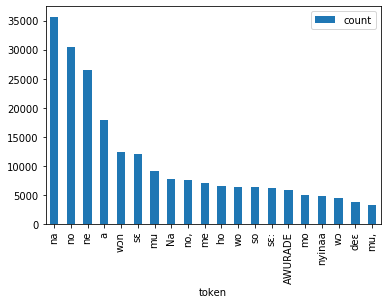

In [35]:
freq_asante = pd.DataFrame.from_records(twi_counter.most_common(20),columns=['token','count'])
freq_asante.plot(kind = 'bar', x='token')

In [37]:
from wordcloud import WordCloud

def wordcloud(counter):
    wc = WordCloud(width=1200,height=800,background_color="white",max_words=200)
    wc.generate_from_frequencies(twi_counter)

    fig = plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

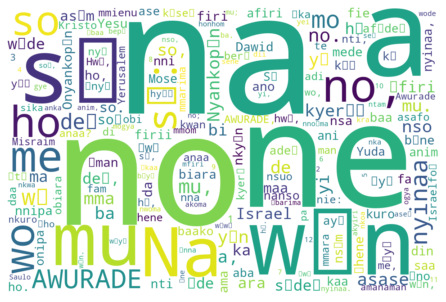

In [38]:
# Lol tried to create a word cloud missed some character
wordcloud(twi_counter)

# Globse text analysis

In [ ]:
glosbe_tokens = glosbe['some_twi_phrases'].map(tokenizer).sum()